In [1]:
# Step 1: Data Collection & Preparation

import pandas as pd

# Sample resume and job description data
data = {
    'resume_id': ['R1', 'R2', 'R3'],
    'resume_text': [
        "Experienced software engineer skilled in Python, machine learning, and web development. Worked on AI-based projects and backend systems.",
        "Data analyst with experience in SQL, Excel, and Power BI. Interested in data visualization and insights generation.",
        "Frontend developer skilled in HTML, CSS, JavaScript, and React. Built responsive web applications and UI components."
    ]
}

job_data = {
    'job_id': ['J1', 'J2'],
    'job_text': [
        "Looking for a machine learning engineer proficient in Python, TensorFlow, and AI development.",
        "Hiring frontend developer with strong skills in React, JavaScript, and modern web frameworks."
    ]
}

# Convert to DataFrames
resumes_df = pd.DataFrame(data)
jobs_df = pd.DataFrame(job_data)

# Display
print("📄 Resumes Data:")
display(resumes_df)
print("\n💼 Job Descriptions Data:")
display(jobs_df)


📄 Resumes Data:


,resume_id,resume_text
0,R1,Experienced software engineer skilled in Pytho...
1,R2,"Data analyst with experience in SQL, Excel, an..."
2,R3,"Frontend developer skilled in HTML, CSS, JavaS..."



💼 Job Descriptions Data:


,job_id,job_text
0,J1,Looking for a machine learning engineer profic...
1,J2,Hiring frontend developer with strong skills i...


In [2]:
# Step 2: Text Preprocessing

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning
resumes_df['clean_text'] = resumes_df['resume_text'].apply(clean_text)
jobs_df['clean_text'] = jobs_df['job_text'].apply(clean_text)

print("✅ Cleaned Text Samples:")
display(resumes_df[['resume_id', 'clean_text']])
display(jobs_df[['job_id', 'clean_text']])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


✅ Cleaned Text Samples:


,resume_id,clean_text
0,R1,experienced software engineer skilled python m...
1,R2,data analyst experience sql excel power bi int...
2,R3,frontend developer skilled html cs javascript ...


,job_id,clean_text
0,J1,looking machine learning engineer proficient p...
1,J2,hiring frontend developer strong skill react j...


In [3]:
# Step 3: Feature Extraction (Vectorization)

from sklearn.feature_extraction.text import TfidfVectorizer

# Combine all text (so that resume & job vectors share same vocabulary)
all_text = list(resumes_df['clean_text']) + list(jobs_df['clean_text'])

vectorizer = TfidfVectorizer()
vectorizer.fit(all_text)

resume_vectors = vectorizer.transform(resumes_df['clean_text'])
job_vectors = vectorizer.transform(jobs_df['clean_text'])

print("✅ Vectorization complete. Vocabulary size:", len(vectorizer.get_feature_names_out()))


✅ Vectorization complete. Vocabulary size: 45


In [4]:
# Step 4: Similarity Computation

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Compute similarity matrix (resumes x jobs)
similarity_matrix = cosine_similarity(resume_vectors, job_vectors)

# Create DataFrame for better readability
similarity_df = pd.DataFrame(similarity_matrix,
                             index=resumes_df['resume_id'],
                             columns=jobs_df['job_id'])

print("📊 Cosine Similarity Matrix:")
display(similarity_df)

# Find top matching resume for each job
top_matches = similarity_df.apply(lambda col: col.sort_values(ascending=False).head(1))
print("\n🏆 Top Matches (Highest Similarity per Job):")
display(top_matches)


📊 Cosine Similarity Matrix:


job_id,J1,J2
resume_id,,
R1,0.358603,0.046908
R2,0.000000,0.000000
R3,0.000000,0.328775



🏆 Top Matches (Highest Similarity per Job):


job_id,J1,J2
resume_id,,
R1,0.358603,NaN
R3,NaN,0.328775


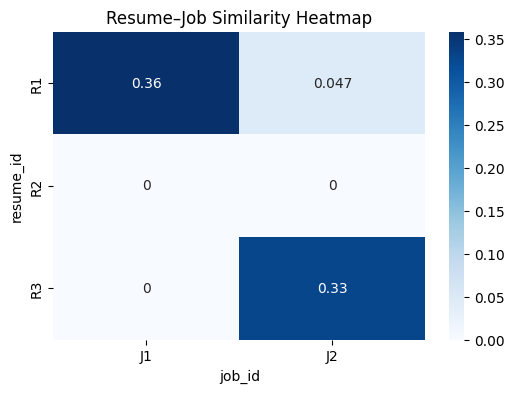

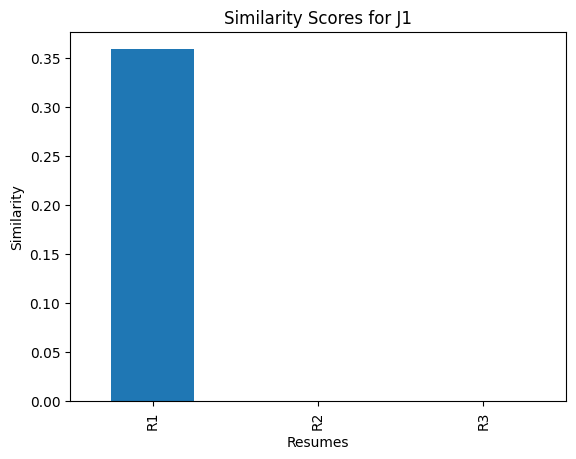

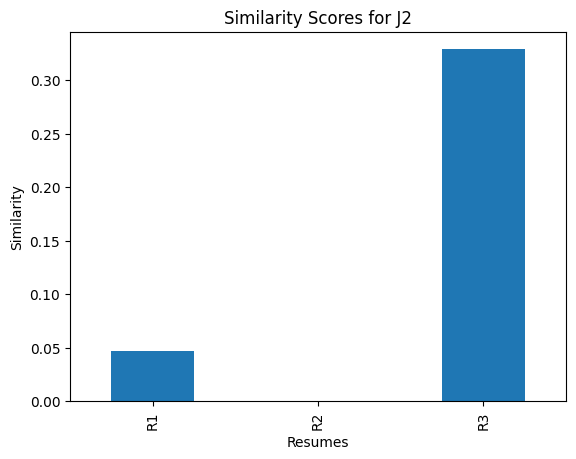

In [5]:
# Step 5: Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(similarity_df, annot=True, cmap='Blues')
plt.title("Resume–Job Similarity Heatmap")
plt.show()

# Bar chart for each job
for job in similarity_df.columns:
    similarity_df[job].plot(kind='bar', title=f"Similarity Scores for {job}")
    plt.ylabel('Similarity')
    plt.xlabel('Resumes')
    plt.show()


In [6]:
# Step 6: Documentation & Reporting

print("📘 Project Summary:")
print("""
✅ Steps Completed:
1. Collected and cleaned sample resume and job text.
2. Preprocessed using tokenization, stopword removal, and lemmatization.
3. Converted text into numerical vectors using TF-IDF.
4. Calculated cosine similarity to find best resume-job matches.
5. Visualized results using heatmaps and bar charts.

💡 Future Improvements:
- Use BERT or Sentence Transformers for better semantic understanding.
- Include more contextual data like skills, experience years, and domain tags.
- Extract resumes from PDFs automatically.
- Weight certain sections (e.g., Skills) higher during matching.

⚠️ Limitations:
- TF-IDF doesn’t capture meaning beyond word frequency.
- Different phrasing for the same skill may reduce similarity.
""")


📘 Project Summary:

✅ Steps Completed:
1. Collected and cleaned sample resume and job text.
2. Preprocessed using tokenization, stopword removal, and lemmatization.
3. Converted text into numerical vectors using TF-IDF.
4. Calculated cosine similarity to find best resume-job matches.
5. Visualized results using heatmaps and bar charts.

💡 Future Improvements:
- Use BERT or Sentence Transformers for better semantic understanding.
- Include more contextual data like skills, experience years, and domain tags.
- Extract resumes from PDFs automatically.
- Weight certain sections (e.g., Skills) higher during matching.

⚠️ Limitations:
- TF-IDF doesn’t capture meaning beyond word frequency.
- Different phrasing for the same skill may reduce similarity.

